In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## K-mer occurrence probability

In [2]:
alphabet_size = 4
def distinct_kmer_count(k):
    return alphabet_size**k

def vanilla_kmer_occ_prob(k, bin_size):
    return min(1.0, bin_size / distinct_kmer_count(k))

def kmer_count(seq_len, k, kmer_hits):
    if (kmer_hits > 1):
        return kmer_count(seq_len - k, k, kmer_hits - 1)
    else:
        return seq_len - k + 1

def swenja_kmer_occ_prob(k, bin_size):
    kmer_occ_prob = (bin_size - k + 1)*(1 / alphabet_size)**k # single k-mer hit
    max_kmers = bin_size // k
    
    for kmer_hits in range(2, max_kmers + 1, 1):             
        
        kmer_placements = kmer_count(bin_size, k, kmer_hits)          
        
        #for last_kmer_pos in range(bin_size - (kmer_hits - 1) * k - k + 2):
        #    kmer_placements += last_kmer_pos
    
        ith_union_prob = (kmer_hits * kmer_placements)*(1 / alphabet_size)**(k * kmer_hits)
        print(str(kmer_hits) + "\t" + str(kmer_placements) + "\t" + str(ith_union_prob) + "\n")
        if (kmer_hits % 2 == 0):
            kmer_occ_prob -= ith_union_prob
        else: 
            kmer_occ_prob += ith_union_prob

    #print(str(max_kmers) + "\t" + str(bin_size) + "\t" + str(kmer_occ_prob))
    return kmer_occ_prob

In [50]:
(1024-11)*alphabet_size**1013 / alphabet_size**1024

0.0002415180206298828

In [51]:
(2048-11)*alphabet_size**2035 / alphabet_size**2048

3.0353665351867676e-05

In [3]:
swenja_kmer_occ_prob(3, 12)

2	7	0.00341796875

3	4	4.57763671875e-05

4	1	2.384185791015625e-07



0.1528775691986084

In [53]:
#https://stackoverflow.com/questions/6790620/probability-of-3-character-string-appearing-in-a-randomly-generated-password
bin_size = 1024
vanilla_p = []
swenja_p = []
k = 11
for i in range(10):
    vanilla_p.append(vanilla_kmer_occ_prob(k, bin_size))
    swenja_p.append(swenja_kmer_occ_prob(k, bin_size))
    bin_size += 1024

2	503506	5.724200491386e-08

3	492528	2.002499728537277e-14

4	481671	6.225451762953584e-21

5	470935	1.813975636720006e-27

6	460320	5.072845870973582e-34

7	449826	1.3788698065917582e-40

8	439453	3.670482719200455e-47

9	429201	9.615327768983808e-54

10	419070	2.4870672345097243e-60

11	409060	6.36679326934897e-67

12	399171	1.615925642955752e-73

13	389403	4.071588560023601e-80

14	379756	1.0195159285979081e-86

15	370230	2.53900933124662e-93

16	360825	6.293005759573774e-100

17	351541	1.5531254163804437e-106

18	342378	3.818563990912166e-113

19	333336	9.356159848036207e-120

20	324415	2.2852453295051266e-126

21	315615	5.56568897768569e-133

22	306936	1.3519250291868646e-139

23	298378	3.2757958519016494e-146

24	289941	7.919233776653757e-153

25	281625	1.9103528833732146e-159

26	273430	4.598984974047729e-166

27	265356	1.1050330102114883e-172

28	257403	2.6502955452023583e-179

29	249571	6.345339792079963e-186

30	241860	1.516659762815015e-192

31	234270	3.619272879850122e-199

In [56]:
vanilla_p

[0.000244140625,
 0.00048828125,
 0.000732421875,
 0.0009765625,
 0.001220703125,
 0.00146484375,
 0.001708984375,
 0.001953125,
 0.002197265625,
 0.00244140625]

In [57]:
swenja_p

[0.0002416991972240955,
 0.0004856633948665042,
 0.0007295083832619945,
 0.0009732341624105668,
 0.0012168407323122207,
 0.0014603280929669565,
 0.0017036962443747739,
 0.0019469451865356732,
 0.002190074919449654,
 0.0024330854431167167]

## Objective function

In [15]:
err_list = [0, 3, 2, 4, 5]

def find_FPR(pattern_p):
    none_match_p = (1 - pattern_p)**patterns_per_segment
    return min(1 - none_match_p, 1)


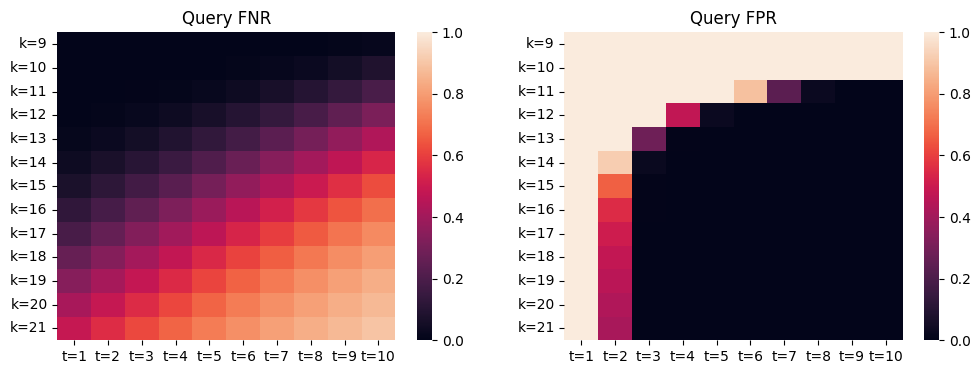

In [38]:
er = 4

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)
#fig.suptitle('Query k-mer thresholds')

fnr_df = pd.read_csv('fnr_' + str(er) + '.tsv', sep='\t', index_col=0)
fnr_df = fnr_df.iloc[:, :-1]    

sns.heatmap(fnr_df, ax = axs[0], vmin=0, vmax=1)
axs[0].set_title("Query FNR")

# these are the false positive probabilities of a pattern appearing in a reference bin
pattern_fp_df = pd.read_csv('fpr_' + str(er) + '.tsv', sep='\t', index_col=0)
pattern_fp_df = pattern_fp_df.iloc[:, :-1]    

# recreation of FPR calculation in filtering_request.hpp
query_len = 100000000
query_seg_count = 10000
pattern = 50
query_every = 2
patterns_per_segment = (query_len / query_seg_count - pattern + 1) / query_every  

fpr_df = pattern_fp_df.map(find_FPR)

sns.heatmap(fpr_df, ax = axs[1], vmin=0, vmax=1)    
axs[1].set_title("Query FPR")

fig.savefig('100Mb.4e.50l.heatmap.png', dpi=400, bbox_inches='tight')
plt.show()